# Neural Networks
## MSDS 7333 - Section 401
## Case Study Week 15
[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

### Due:
20 August 2018

### Table of Contents
* [Team Members](#Team-Members)
* [Abstract](#Abstract)
* [Introduction](#Introduction)
* [Methods](#Methods)
* [Results](#Results)
* [Conclusion](#Conclusion)
* [References](#References)

### <a name="Team-Members"></a>Team Members
* Kevin Cannon
* Austin Hancock

### <a name="Abstract"></a>Abstract

Starting with a generic, large, and unlabeled data set, the data was cleaned and explored to select an appropriate model. The random forest machine learning model was selected, and the data was further processed and split in preparation to train the model. Then, the random forest model was used to make predictions on the test set, and model performance was assessed based on accuracy.

### <a name="Introduction"></a>Introduction

When working with data, having to perform some sort of maintenance on the data is a given. Whether it is a simple type change (i.e. character to numeric), or perhaps something more sinister like deciphering table data stored in an AS400 database which has a limit on column name length making them less than informative. Whatever the data source may be, you will need to do some cleaning to get the data into workable condition.

Data preparation is an integral step to any machine learning task. As such, the pandas package will be used for much of data preparation. Pandas is an open source library providing data manipulation and analysis tools in the Python programming language. The pandas package is built on top of NumPy and is intended to integrate well within a scientific computing environment. Seaborn, a data visualization library based on the matplotlib package, is also used to create graphics.

After data preparation, exploratory data analysis (EDA) is the next critical step to any data analysis project. EDA consists of using both quantitative and visual means to better understand and summarize a data set before jumping into deeper analysis. EDA is critical prior to machine learning tasks by providing the necessary context to choose and develop an appropriate model given a problem and to help interpret the results. EDA also provides a path forward to indicate any remaining steps of data preparation that are required prior to modeling.

Once the data is prepared, machine learning packages can be employed to model the data. To complete the modeling, machine learning package scikit-learn is used, which contains several different core functions including classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.

### <a name="Methods"></a>Methods

Our analysis of the data was performed in two stages: clean and format the data for modeling and then create a prediction model to correctly classify the observation as one of two classes.

#### Initialize Data

We begin our analysis by first inspecting the dataset. Reading in the information from the csv file provided, we can see that there are 51 generic variables, including the response variable, for a set of 160,000 observations. Of those attributes, the first 50 are consecutively labeled “x0” through “x49”, while the last attribute, the response variable, is labeled “y.” 

As we were not provided with variable names or descriptions, we will need to make our decisions soley based on the observed data values. In order to do this selection, we need to examine each of the columns to determine their distributions, adjust for outliers, and properly format the data for modeling.

In [7]:
import pandas as pd

In [8]:
data=pd.read_csv("QW_final_project.csv")

In [3]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

> Within the dataset there are 45 variables of type float, 1 of type int, and 5 string variables.

To identify anomalies, summary statistics of the numerical values are computed.

In [4]:
data.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,...,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,...,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,...,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,...,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,...,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,...,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,...,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854,8.226552,66.877604,1.000000


> After review, there are no entries that initially appear irregular. However, without background information for any of the variables or the data set as a whole, it is difficult to have an idea about the appropriate value ranges for each attribute. To get a better idea of the numerical data distribution, we can plot the features instead.

First, we list all the data types from the data set to isolate the numeric features.

In [5]:
list(set(data.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [6]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


Now, we plot the data in a grid to get a quick, high-level look at the distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E8B1571D0>,
      dtype=object)

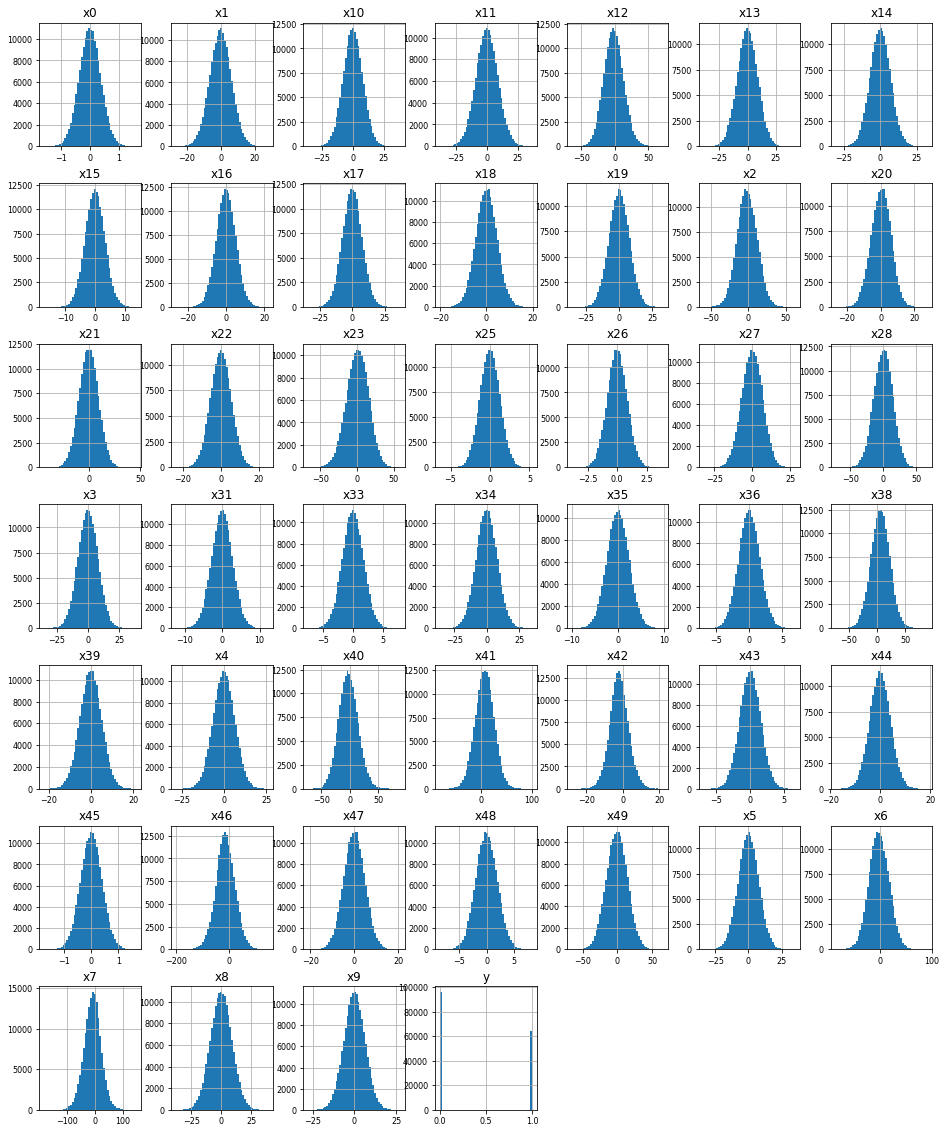

In [8]:
%matplotlib inline
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

> With the exception of the response variable, all the attributes seem to share a very similar distribution of values at first glance. Again, this exploration does not provide any indications of problems with the data.

#### Clean Data

The classification task we are trying to create a model for is prediciting whether or not an observation is either of two classes. Below we can see that this binary variable is not quite evenly distributed with nearly 60% of observations belonging to class 0. To determine the differences, if any, of the variables within each classification we created plots to show the distributions of each variable between classes.

In [14]:
data.groupby(['y']).size().reset_index(name='counts')

,y,counts
0,0,95803
1,1,64197


In [15]:
data0 = data.loc[data['y'] == 0]
data1 = data.loc[data['y'] == 1]

In [16]:
# Loop through columns and ouput information about each 
# Since 60% of our responses are 0, then we would expect to see about the same percentage...
# ...of missing values (60%) to be from response 0.
for i in range(len(data.columns) - 1):
    string = 'x' + str(i)
    print("Variable: ", string)
    print("-------------------")
    print("Total Missing: ", data[string].isnull().sum())
    print("Missing resp=0: ", data0[string].isnull().sum(), data0[string].isnull().sum()/data[string].isnull().sum())
    print("Missing resp=1: ", data1[string].isnull().sum(), data1[string].isnull().sum()/data[string].isnull().sum())
    print(" ")

Variable:  x0
-------------------
Total Missing:  26
Missing resp=0:  19 0.730769230769
Missing resp=1:  7 0.269230769231
 
Variable:  x1
-------------------
Total Missing:  25
Missing resp=0:  13 0.52
Missing resp=1:  12 0.48
 
Variable:  x2
-------------------
Total Missing:  38
Missing resp=0:  21 0.552631578947
Missing resp=1:  17 0.447368421053
 
Variable:  x3
-------------------
Total Missing:  37
Missing resp=0:  23 0.621621621622
Missing resp=1:  14 0.378378378378
 
Variable:  x4
-------------------
Total Missing:  26
Missing resp=0:  19 0.730769230769
Missing resp=1:  7 0.269230769231
 
Variable:  x5
-------------------
Total Missing:  37
Missing resp=0:  21 0.567567567568
Missing resp=1:  16 0.432432432432
 
Variable:  x6
-------------------
Total Missing:  26
Missing resp=0:  16 0.615384615385
Missing resp=1:  10 0.384615384615
 
Variable:  x7
-------------------
Total Missing:  27
Missing resp=0:  16 0.592592592593
Missing resp=1:  11 0.407407407407
 
Variable:  x8
--------

> As expected, the distribution of each missing variable between classes is consistent with the roughly 60% distribution of observations belonging to 0. While some percentages fluctuated a bit around the 60% mark, none of the missing variable values strayed far enough away to generate concern.

Now that the missing values have been confirmed to be consistently distributed, we remove the entries from these separate data subsets. Then, the distributions can be compared by the response variable to ensure that the remaining entries are consistent between classes. Overlaying these distributions in a single plot allows us to quickly spot any differences.

In [17]:
# Drop NaN
data0_Clean = data0.copy()
data0_Clean = data0_Clean.select_dtypes(include=['int64','float']) 
data0_Clean = data0_Clean.dropna()

data1_Clean = data1.copy()
data1_Clean = data1_Clean.select_dtypes(include=['int64','float']) 
data1_Clean = data1_Clean.dropna()

In [18]:
data_Clean = data.select_dtypes(include=['int64', 'float'])

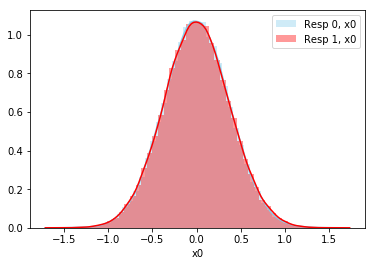

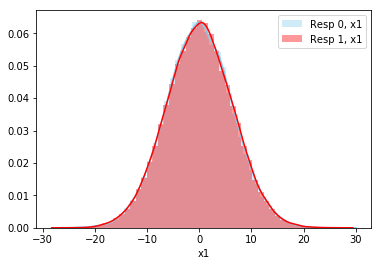

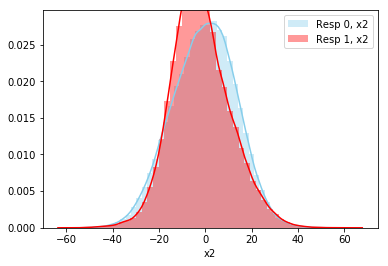

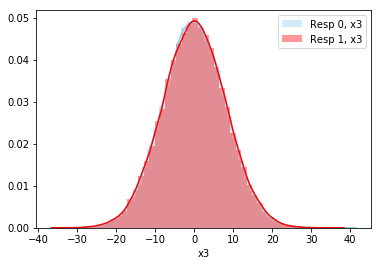

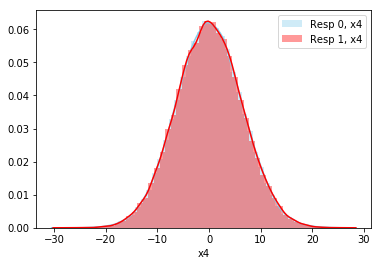

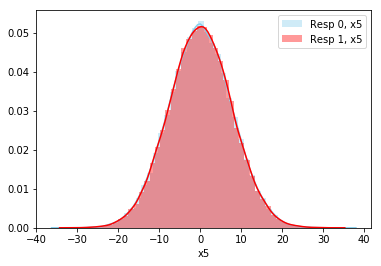

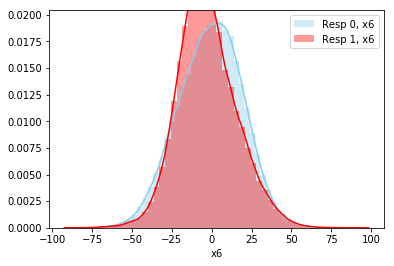

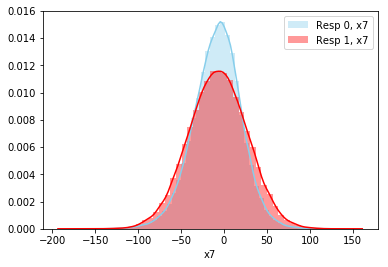

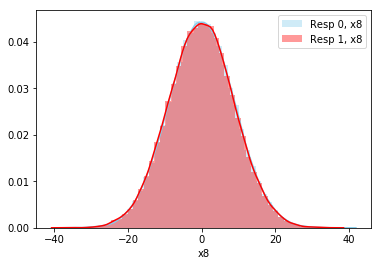

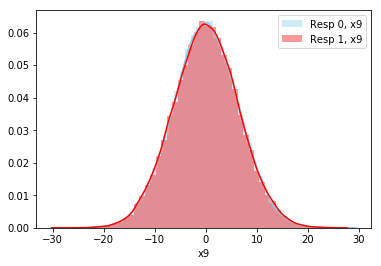

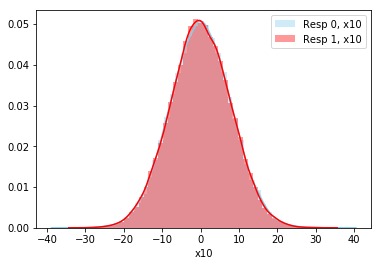

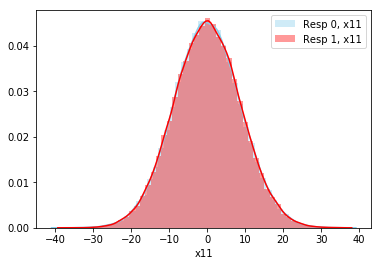

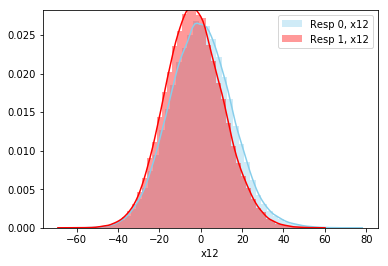

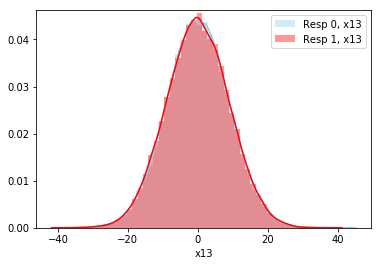

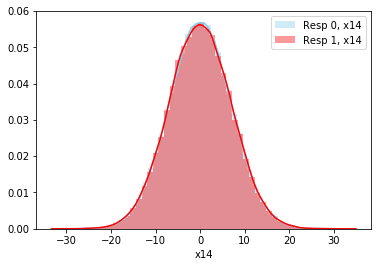

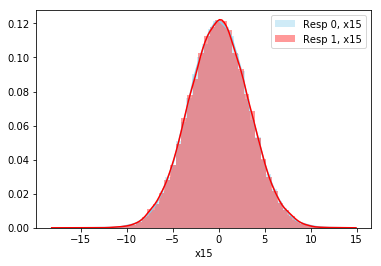

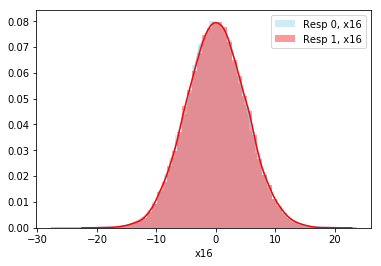

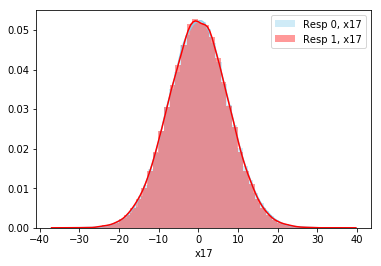

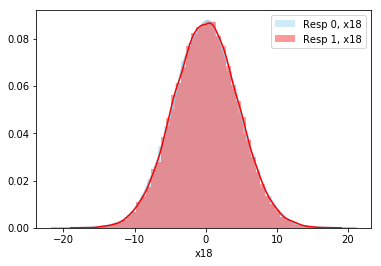

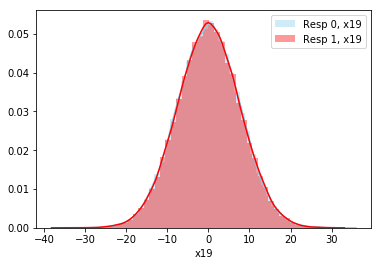

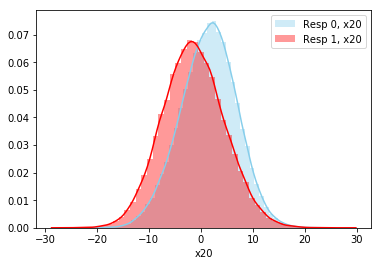

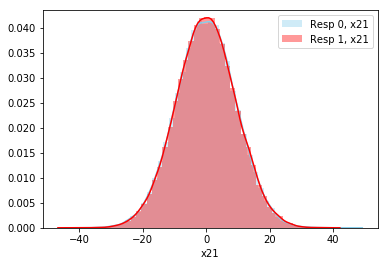

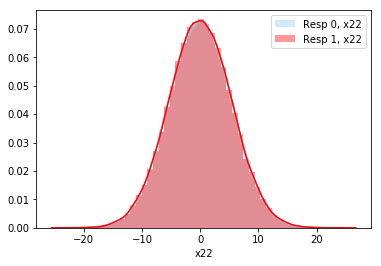

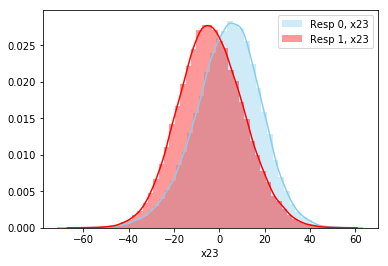

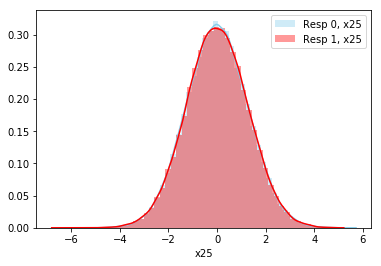

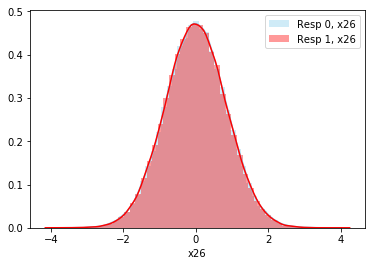

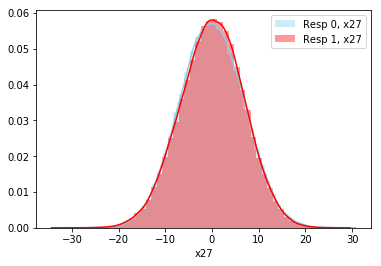

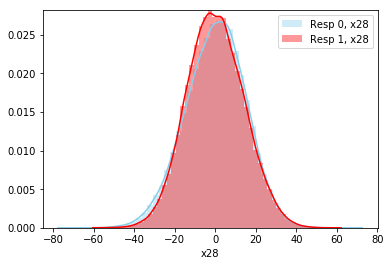

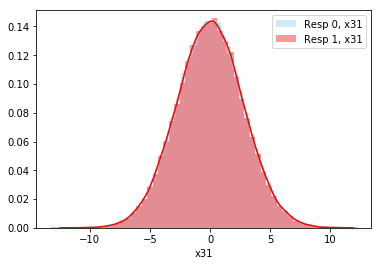

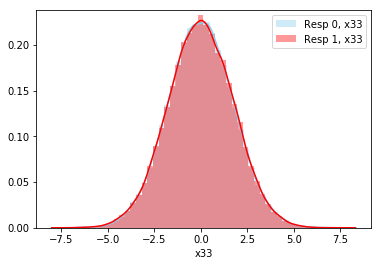

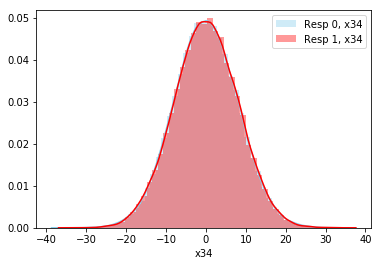

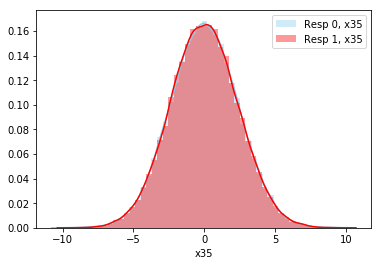

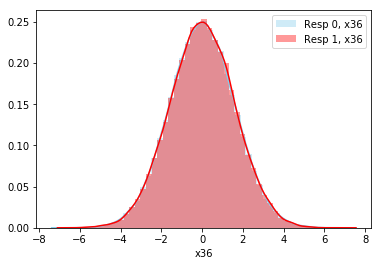

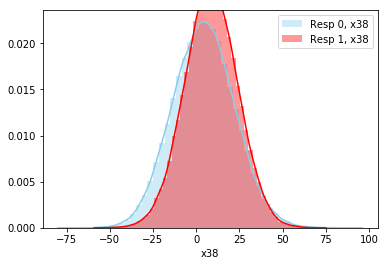

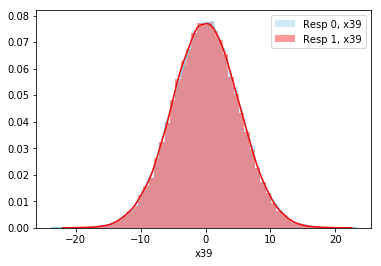

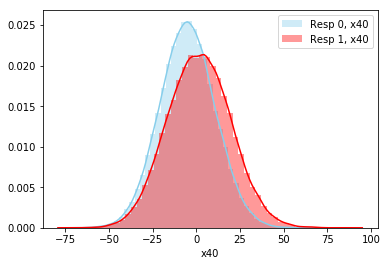

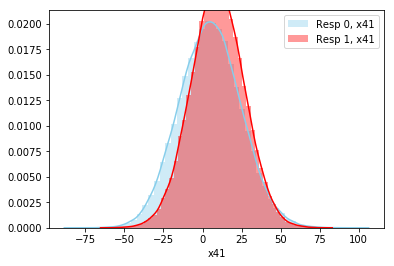

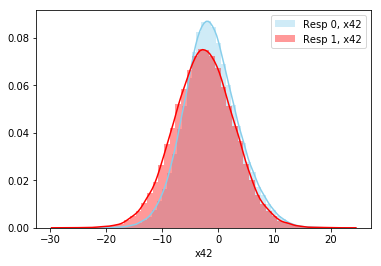

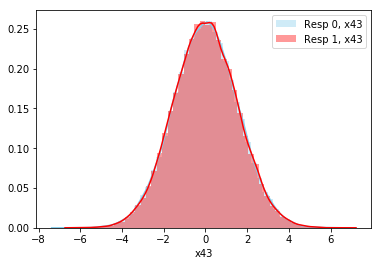

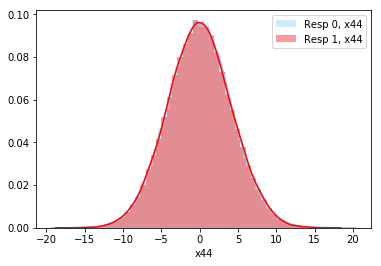

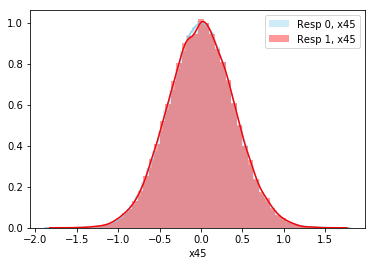

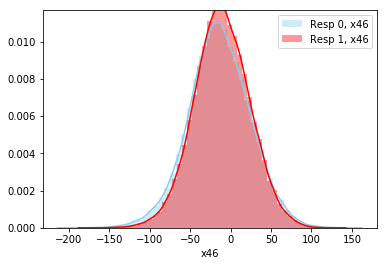

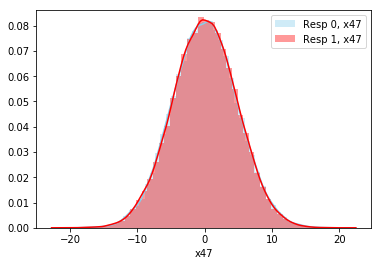

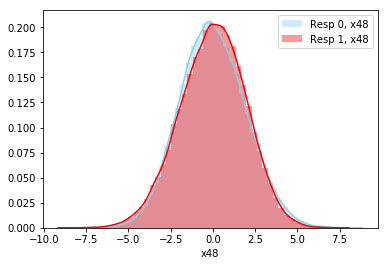

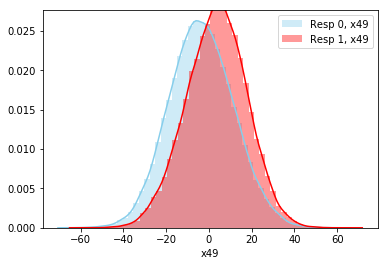

C:\Users\ahancock\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ahancock\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


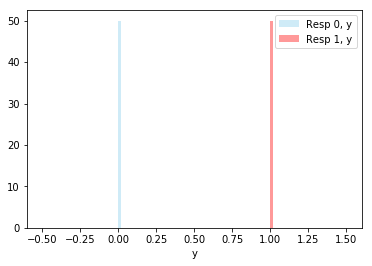

In [19]:
# Loop through cols to see if distribution is different for different response variable values
for i in list(data_Clean.columns.values):
    sns.distplot( data0_Clean[i] , color="skyblue", label="Resp 0, " + i)
    sns.distplot( data1_Clean[i] , color="red", label="Resp 1, " + i)
    plt.legend()
    plt.show()

> Differences in distribution between response variable values can be visually detected for the following variables:
    - x2
    - x6
    - x7
    - x12
    - x20
    - x23
    - x27
    - x28
    - x38
    - x40
    - x41
    - x42
    - x46
    - x48
    - x49
    
We will need to keep an eye on these as this difference in distribution is indicative of feature importance.

Next, we check to see if we have any missing values. From the information below, we know that our data set does have missing values. To clean our dataset we have decided to drop all observations that contain missing values.

In [20]:
# Loop through columns and ouput information about each
for i in range(len(data.columns) - 1):
    string = 'x' + str(i)
    print("Variable: ", string)
    print("-------------------")
    print("Missing: ", data[string].isnull().sum())
    print(data[string].describe())
    print(" ")

Variable:  x0
-------------------
Missing:  26
count    159974.000000
mean         -0.001028
std           0.371137
min          -1.592635
25%          -0.251641
50%          -0.002047
75%           0.248532
max           1.600849
Name: x0, dtype: float64
 
Variable:  x1
-------------------
Missing:  25
count    159975.000000
mean          0.001358
std           6.340632
min         -26.278302
25%          -4.260973
50%           0.004813
75%           4.284220
max          27.988178
Name: x1, dtype: float64
 
Variable:  x2
-------------------
Missing:  38
count    159962.000000
mean         -1.150145
std          13.273480
min         -59.394048
25%         -10.166536
50%          -1.340932
75%           7.871676
max          63.545653
Name: x2, dtype: float64
 
Variable:  x3
-------------------
Missing:  37
count    159963.000000
mean         -0.024637
std           8.065032
min         -35.476594
25%          -5.454438
50%          -0.031408
75%           5.445179
max          38.90

count     159977
unique    129198
top       $237.4
freq           6
Name: x37, dtype: object
 
Variable:  x38
-------------------
Missing:  31
count    159969.000000
mean          6.059130
std          16.891603
min         -74.297559
25%          -5.249882
50%           6.184410
75%          17.420148
max          90.467981
Name: x38, dtype: float64
 
Variable:  x39
-------------------
Missing:  23
count    159977.000000
mean          0.004253
std           5.134322
min         -22.101647
25%          -3.458716
50%           0.019068
75%           3.463308
max          21.545591
Name: x39, dtype: float64
 
Variable:  x40
-------------------
Missing:  36
count    159964.000000
mean         -2.316526
std          17.043549
min         -74.059196
25%         -13.953629
50%          -2.701867
75%           8.981616
max          88.824477
Name: x40, dtype: float64
 
Variable:  x41
-------------------
Missing:  40
count    159960.000000
mean          6.701076
std          18.680196
min     

In [9]:
# drop rows with missing data
data = data.dropna()

> Across all the variables, the highest number of missing values occurs in variable x23 with 47 missing entries out of a total of 160,000. With so few missing entries across the variables, the outright removal of the values does not negatively impact the data set overall.

Next, we check to see if there are any confounding variables we may need to control for. If two variables are found to be highly correlated, then we will need to remove one of the variables from our dataset before we begin our modeling process. As a quick check to determine if a control is needed, we create a correlation heatmap of our variables.

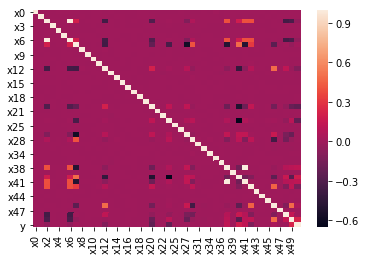

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr())
plt.show()

> From the plot above, we see that there are indeed some variables that are highly correlated. Due to the large number of varibles, we need an easier way to see the variables we are interested. Below, we set a correlation criterian of 75% and return the variables that produce a score higher than our cut off value.

In [10]:
import numpy as np

highCorr = data.corr().abs()
s = highCorr.unstack()
so = s.sort_values(kind="quicksort")
high = np.where((so > .75))
print(so.index.values[[high]])

[[('x2', 'x6') ('x6', 'x2') ('x0', 'x0') ('x48', 'x48') ('x20', 'x20')
  ('x19', 'x19') ('x18', 'x18') ('x17', 'x17') ('x16', 'x16')
  ('x15', 'x15') ('x14', 'x14') ('x13', 'x13') ('x12', 'x12')
  ('x21', 'x21') ('x11', 'x11') ('x9', 'x9') ('x8', 'x8') ('x7', 'x7')
  ('x6', 'x6') ('x5', 'x5') ('x4', 'x4') ('x3', 'x3') ('x2', 'x2')
  ('x1', 'x1') ('x10', 'x10') ('x49', 'x49') ('x22', 'x22')
  ('x25', 'x25') ('x47', 'x47') ('x46', 'x46') ('x45', 'x45')
  ('x44', 'x44') ('x43', 'x43') ('x42', 'x42') ('x41', 'x41')
  ('x40', 'x40') ('x23', 'x23') ('x39', 'x39') ('x38', 'x38')
  ('x36', 'x36') ('x35', 'x35') ('x34', 'x34') ('x33', 'x33')
  ('x31', 'x31') ('x28', 'x28') ('x27', 'x27') ('x26', 'x26') ('y', 'y')
  ('x41', 'x38') ('x38', 'x41')]]


> From above, we can see that there are some variables that are highly correlated (x38 and x 41 [100%], x2 and x6 [100%]). We will need to drop one from each of these pairs.

Variables x6 and x41 are dropped, then the correlation check is run again to confirm that the strong correlations have been removed.

Without information about the variables themselves, there is no way to determine if these variables have logical or explainable correlations. Without the ability to distinguish the meanings, there is no way for us to determine if variables can be combined or packaged in some way, so we simply have to choose a variable and eliminate it.

In [11]:
# Drop correlated columns
## Drop 6 of the 2,6 correlation group
## Drop 41 of 38, 41 correlattion group
data = data.drop(['x6', 'x41'], axis=1)

In [12]:
highCorr = data.corr().abs()
s = highCorr.unstack()
so = s.sort_values(kind="quicksort")
high = np.where((so > .75))
print(so.index.values[[high]])

[[('x0', 'x0') ('x48', 'x48') ('x19', 'x19') ('x18', 'x18')
  ('x17', 'x17') ('x16', 'x16') ('x15', 'x15') ('x14', 'x14')
  ('x13', 'x13') ('x12', 'x12') ('x20', 'x20') ('x11', 'x11')
  ('x9', 'x9') ('x8', 'x8') ('x7', 'x7') ('x5', 'x5') ('x4', 'x4')
  ('x3', 'x3') ('x2', 'x2') ('x1', 'x1') ('x10', 'x10') ('x49', 'x49')
  ('x21', 'x21') ('x23', 'x23') ('x47', 'x47') ('x46', 'x46')
  ('x45', 'x45') ('x44', 'x44') ('x43', 'x43') ('x42', 'x42')
  ('x40', 'x40') ('x39', 'x39') ('x22', 'x22') ('x38', 'x38')
  ('x35', 'x35') ('x34', 'x34') ('x33', 'x33') ('x31', 'x31')
  ('x28', 'x28') ('x27', 'x27') ('x26', 'x26') ('x25', 'x25')
  ('x36', 'x36') ('y', 'y')]]


> At this point, there are no additional strong correlations between variables that meet our cut off criteria.

##### Variable check

To finish the data cleaning process, we next turned our attention to categorical variables and variables that needed to be adjusted in order to be correctly processed. Our set contains 3 categorical variables which appear to represent country, month, and day of week for a given observation. Our analysis of these categorical variables show that no adjustments were needed as each value was properly mapped, however, we will need to create dummy variables for these.

In [25]:
# x24
print(data['x24'].unique())
# Should be 'europe' not 'euorpe'

# x29
print(data['x29'].unique())
# Should be 'Dec' not 'Dev'

# x30
print(data['x30'].unique())
# Only week days
# Should be 'thursday' not 'thurday'

# Was checking to see if we needed to combine/edit any of the categorical vars
# None of these mistakes really matter.

['euorpe' 'asia' 'america']
['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' 'Mar' 'Feb' 'Dev'
 'January']
['tuesday' 'wednesday' 'thurday' 'monday' 'friday']


To create dummy variables for these categorical variables, we perform a process called one-hot encoding of the data. This process takes categorical variables and converts them to a numerical representation without an arbitrary ordering. Essentially, we change a single column, like months, into twelve columns of binary data.

In [26]:
# Create dummies for categorical vars
# x24
dummies = pd.get_dummies(data['x24']).rename(columns=lambda x: 'x24_' + str(x))
data = pd.concat([data, dummies], axis=1)
data.drop(['x24'], inplace=True, axis=1)

# x29
dummies = pd.get_dummies(data['x29']).rename(columns=lambda x: 'x29_' + str(x))
data = pd.concat([data, dummies], axis=1)
data.drop(['x29'], inplace=True, axis=1)

# x30
dummies = pd.get_dummies(data['x30']).rename(columns=lambda x: 'x30_' + str(x))
data = pd.concat([data, dummies], axis=1)
data.drop(['x30'], inplace=True, axis=1)

With our categorical variables accounted for, we next needed to adjust values for variables x32 and x37. Each of these variables contain a character value that needs to be removed before modeling can be done. This is done below by stripping out the characters and converting the data types from strings to floats.

In [27]:
# Edit currency field from string to float by dropping '$'
data['x37'] = data['x37'].dropna()
data['x37'] = data['x37'].str.replace(',','')
data['x37'] = data['x37'].str.replace('$','')
data['x37'] = data['x37'].astype(float)
print(data['x37'].head())

# Edit % field from string to float by dropping '%'
# drop rows with missing data
data['x32'] = data['x32'].replace({"\%":""}, regex = True)
print(data['x32'].head())

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64
0      0.0
1    -0.02
2    -0.01
3     0.01
4     0.01
Name: x32, dtype: object


Our final dataset which we will be using for our analysis contains 66 variables for 158,392 observations. Finally, we have a clean dataframe ready for analysis.

In [28]:
data.shape

(158392, 66)

#### Random Forest Model

In scikit-learn, the ensemble methods are used to combine the model predictions across multiple estimators with a learning algorithm to improve the results over a the predictions from just a single estimator.

The forest of randomized trees method, or random forests model, is an averaging method. The model builds several independent estimators, or classifiers, then averages the predictions produced by each classifier into a single prediction. Averaging the predictions reduces the variance of the model. As a classifier, the model must be fitted with two arrays – a training set and a test set.

The final step of our data preparation is splitting the data into training and testing data sets. First, we separate the features from the target variable, y. After the data is randomly split between the two sets, we check the shape of the data to ensure the split was successful.

Below, we split our dataset into training and testing with 80% of our observations used to train the model. The remaining 20% of the observations will be used to test how well our model fits the data. To determine the predictive ability of our random forest model, we return the number of misclassified samples along with an accuracy score.

In [29]:
# Create data copy to work with
data_Clean = data.copy()

In [30]:
data_Clean.shape

(158392, 66)

In [38]:
# Prep data for split
model_RandomForest = data_Clean.copy()
model_RandomForest = model_RandomForest.drop(['y'], axis=1) # Drop response var
#print(model_RandomForest.shape)
y = data_Clean['y']
#print(y.shape)

from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(model_RandomForest, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', 
                                n_estimators = 100, 
                                random_state = 1, 
                                n_jobs = 2)
forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# Use this model to make predictions
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 2423
Accuracy: 0.92


>By correctly classifying 92% of the test set observations, our Random Forest model performed the classification task very well. To see where the misclassifications occur, we look below to a confusion matrix.

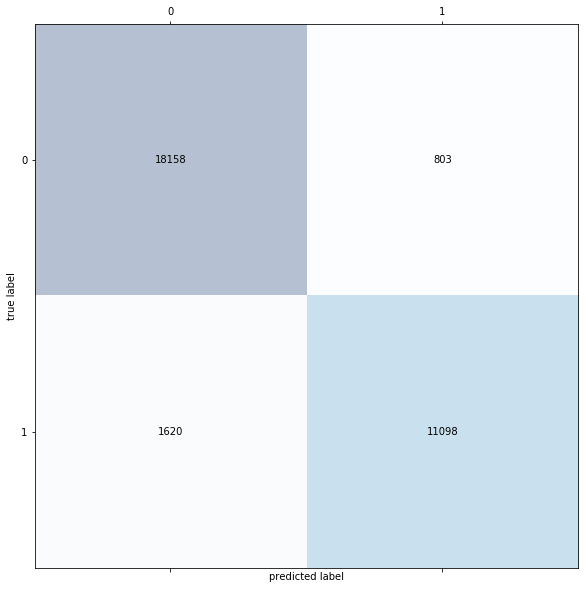

In [40]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
#print(confmat)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

> From the confusion matrix of the baseline random forest model, roughly two-thirds of the 2423 misclassifications were from Type-2 errors, or false negatives.

In order to quantify the usefulness of the variables in the entire random forest, we can look at the relative importances of the variables. In skicit-learn, the importances represent how much the inclusion of a particular variable improves the prediction.

   feature  importance
22     x23    0.066790
43     x48    0.060876
44     x49    0.057997
19     x20    0.056646
37     x42    0.051193
11     x12    0.049279
25     x27    0.047411
34     x38    0.047254
33     x37    0.047230
26     x28    0.046729
36     x40    0.041559
6       x7    0.040533
2       x2    0.039840
41     x46    0.036397
28     x32    0.025320
24     x26    0.009146
29     x33    0.009129
38     x43    0.009080
13     x14    0.009057
15     x16    0.009023


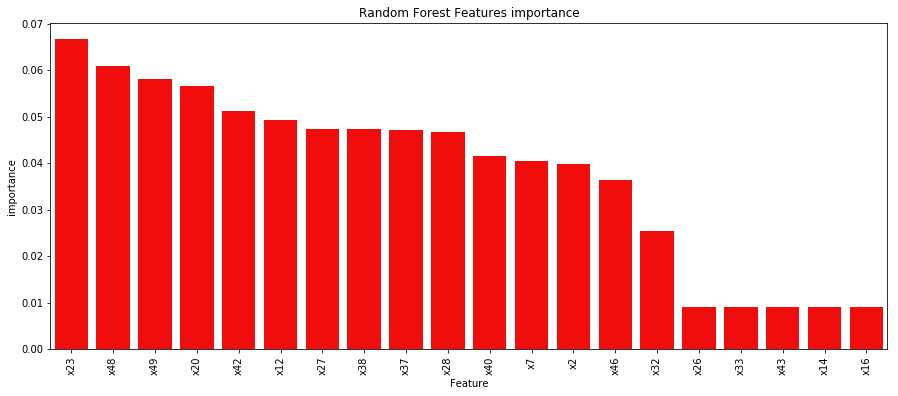

In [39]:
#https://stackoverflow.com/questions/22361781/how-does-sklearn-random-forest-index-feature-importances
importances = pd.DataFrame({'feature':X_train.columns, 'importance': forest.feature_importances_}) 
importances = importances.sort_values('importance',ascending=False)#.set_index('feature') 
 
#only display top 20 importances[:10].plot.bar()
topDF1 = importances.head(20)
print(topDF1)

f, ax = plt.subplots(figsize=(15, 6))

g = sns.barplot('feature', y="importance", data=topDF1, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Random Forest Features importance')
plt.show()

> The above plot reveals that the x23, x48, x49, x20, and x42 variables were the top five most important features when determining classification within our random forest model. The plot also reveals that after our 15th feature (x32) we see a sharp drop off in importance scores that levels out across our final 5 features of the top 20.

In future implementations of the model, we can remove those variables beyond the drop off in importance, and the performance should not suffer. Taking the information learned from our initial model, we created a second random forest model using only the top 15 features from our first model. The results of this model can be seen below. By using only the top features from model-1, we were able to increase our classification accuracy from 92% to 94%.

In [42]:
# Prep data for split
model_RandomForest = data_Clean[['x23', 'x48', 'x49', 'x20', 'x42', 
                                 'x12', 'x27', 'x38', 'x37', 'x28',
                                 'x40', 'x7', 'x2', 'x46', 'x32']].copy()
#model_RandomForest = model_RandomForest.drop(['y'], axis=1) # Drop response var
#print(model_RandomForest.shape)
y = data_Clean['y']
#print(y.shape)

from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(model_RandomForest, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'entropy', 
                                n_estimators = 100, 
                                random_state = 1, 
                                n_jobs = 2)
forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# Use this model to make predictions
y_pred = forest.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 1797
Accuracy: 0.94


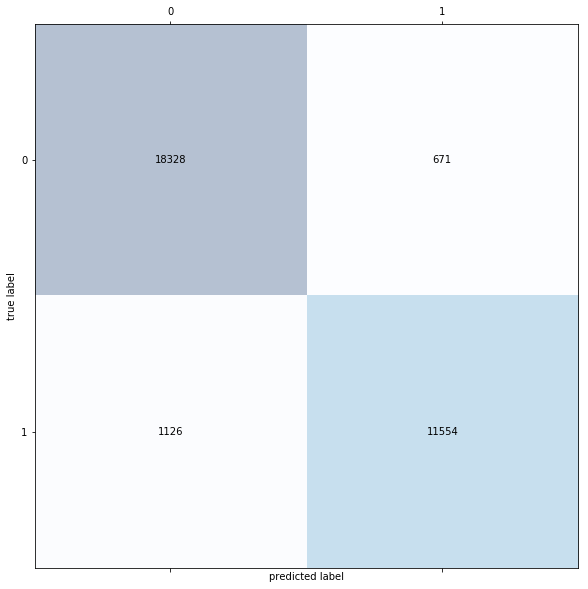

In [43]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
#print(confmat)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

> From the confusion matrix of the baseline random forest model, again, roughly two-thirds of the 1797 misclassifications were from Type-2 errors, or false negatives, which is consistent with the first model.

   feature  importance
0      x23    0.086058
1      x48    0.082169
2      x49    0.079767
3      x20    0.078047
5      x12    0.072381
4      x42    0.071636
9      x28    0.067488
7      x38    0.066716
6      x27    0.065537
8      x37    0.063884
13     x46    0.059118
12      x2    0.057326
11      x7    0.056944
10     x40    0.056279
14     x32    0.036650


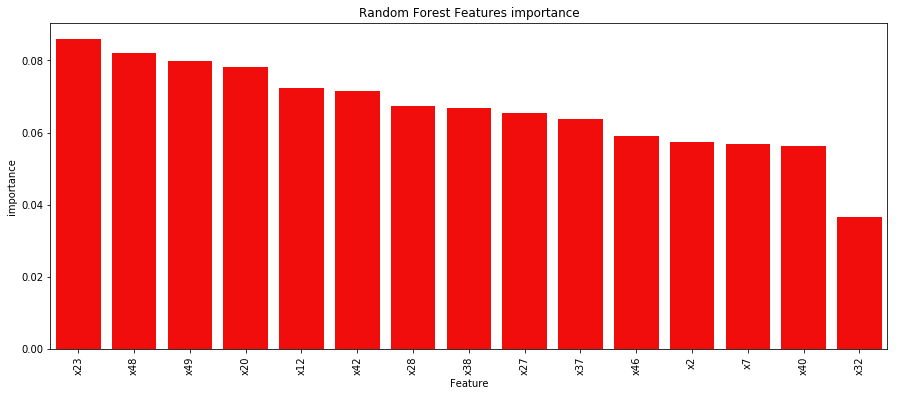

In [44]:
#https://stackoverflow.com/questions/22361781/how-does-sklearn-random-forest-index-feature-importances
importances = pd.DataFrame({'feature':X_train.columns, 'importance': forest.feature_importances_}) 
importances = importances.sort_values('importance',ascending=False)#.set_index('feature') 
 
#only display top 20 importances[:10].plot.bar()
topDF1 = importances.head(20)
print(topDF1)

f, ax = plt.subplots(figsize=(15, 6))

g = sns.barplot('feature', y="importance", data=topDF1, color="red", saturation=.9, ci=68)
g =plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('importance')
plt.title('Random Forest Features importance')
plt.show()

### <a name="Results"></a>Results

In this analysis, we were able to take a dataset with no variable information and clean the data to identify variable distribution patterns, format the data for modeling, create a classification model to determine between a binary response variable, and extract the variable importance from our predictive model.

When a dataset does not contain any information about the variables, it is up to the data to do the talking. Our initial analysis of the variables through distribution plots did not produce much valuable insight. Overall, the data distributions and missing values were both consistent and predictable. However, after grouping our data by our response variable and then replotting the variable distributions, we were able to identify a number of variables which had differing distributions within each response class. Investigation into the variables also led us to two variables – x32 and x37 - which needed to be reformatted and set to another data type in order for us to properly analyze the observations. In terms of confounding variables, we were able to identify two sets of perfectly correlated variables. A correlation heatmap was very useful in identifying these correlations due to the lack of context clues and variable information, which normally lead to logical variable correlations and related effects.

Through the use of our baseline random forest model, we were able to correctly classify 92% of the test set response values. Then, using the variables with the highest feature importance scores from the baseline model, we created a second random forest classifier which produced a higher accuracy score of 94%.

### <a name="Conclusion"></a>Conclusion

Working with a dataset that came with no variable names, description, or documentation of any kind, we were able to clean and format the data, analyze variable importance, and create a machine learning classifier that was able to correctly classify 94% of our test observations. By removing correlations between these anonymous features, we were able to improve our random forest classifier model by 2%. Depending on the implementation, an accuracy of 94% may be more than sufficient for the problem at hand.

To improve on this model, future exploration could focus on obtaining basic information about the original data set. Including any documentation, explanation, or key. Then, variable relationships, expected values, and potential logical correlations could be exposed and explored. With additional variable information and context clues, we would be able to develop better procedures for both the handling of missing values and of feature selection. Feature extraction or combination could be explored through a deeper analysis and understanding of variables.

To improve our classification task, future work could focus on different modeling techniques, such as a neural network, or further tuning of the parameters for our current random forest classifier. Additionally, further data visualization, including decision trees, could be produced to further explain and explore the data set.

Even with these known areas of improvement, we are satisfied with our current accuracy rates for a classification task that came with no contextual information.

### <a name="References"></a>References

[1] Package ‘pandas’. (August 2018). http://pandas.pydata.org/

[2] Package ‘seaborn’. (July 2018). http://seaborn.pydata.org/

[3] Package ‘scikit-learn’. (July 2018). http://scikit-learn.org/stable/